<a href="https://colab.research.google.com/github/JakeOh/202105_itw_bd26/blob/main/lab_da/da09_gapminder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* github에 저장된 gapminder.tsv 파일을 읽고, DataFrame 생성하세요.

In [2]:
file_path = 'https://github.com/JakeOh/202105_itw_bd26/raw/main/datasets/gapminder.tsv'

In [3]:
gapminder = pd.read_csv(file_path, sep='\t')
# 탭으로 값들이 구분된 파일인 경우 sep='\t'

* DataFrame의 정보를 출력하세요.

In [4]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


* DataFrame에서 첫 5개 row와 마지막 5개 row를 출력하세요.

In [5]:
gapminder.head()  # gapminder.iloc[:5]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [6]:
gapminder.tail()  # gapminer.iloc[-5:]

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


* DataFrame에서 숫자 타입 변수들의 기술 통계량을 출력하세요.

In [7]:
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


* DataFrame에 있는 국가 이름의 개수를 찾으세요.

In [10]:
len(gapminder['country'].unique())

142

* DataFrame에 있는 (중복되지 않는) 모든 대륙 이름들을 찾으세요.

In [11]:
gapminder['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

* DataFrame에 있는 연도의 개수를 찾으세요.

In [13]:
len(gapminder['year'].unique())

12

* DataFrame에서 국가 이름, 연도, 1인당 GDP 컬럼을 선택하세요.

In [15]:
gapminder.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [17]:
cols = ['country', 'year', 'gdpPercap']
type(cols)

list

In [18]:
gapminder[cols]

,country,year,gdpPercap
0,Afghanistan,1952,779.445314
1,Afghanistan,1957,820.853030
2,Afghanistan,1962,853.100710
3,Afghanistan,1967,836.197138
4,Afghanistan,1972,739.981106
...,...,...,...
1699,Zimbabwe,1987,706.157306
1700,Zimbabwe,1992,693.420786
1701,Zimbabwe,1997,792.449960
1702,Zimbabwe,2002,672.038623


In [19]:
gapminder.loc[:, cols]

,country,year,gdpPercap
0,Afghanistan,1952,779.445314
1,Afghanistan,1957,820.853030
2,Afghanistan,1962,853.100710
3,Afghanistan,1967,836.197138
4,Afghanistan,1972,739.981106
...,...,...,...
1699,Zimbabwe,1987,706.157306
1700,Zimbabwe,1992,693.420786
1701,Zimbabwe,1997,792.449960
1702,Zimbabwe,2002,672.038623


* DataFrame에서 1인당 GDP의 최솟값, 최댓값을 찾으세요.

In [21]:
# pd.Series.max() 메서드
gapminder['gdpPercap'].max()

113523.1329

In [22]:
# pd.Series.min() 메서드
gapminder['gdpPercap'].min()

241.16587650000002

* DataFrame에서 1인당 GDP가 최소/최대인 row를 찾으세요.

In [23]:
gapminder[gapminder.gdpPercap == gapminder.gdpPercap.max()]

,country,continent,year,lifeExp,pop,gdpPercap
853,Kuwait,Asia,1957,58.033,212846,113523.1329


In [24]:
gapminder[gapminder.gdpPercap == gapminder.gdpPercap.min()]

,country,continent,year,lifeExp,pop,gdpPercap
334,"Congo, Dem. Rep.",Africa,2002,44.966,55379852,241.165877


In [25]:
gapminder[(gapminder.gdpPercap == gapminder.gdpPercap.max()) | 
          (gapminder.gdpPercap == gapminder.gdpPercap.min())]

,country,continent,year,lifeExp,pop,gdpPercap
334,"Congo, Dem. Rep.",Africa,2002,44.966,55379852,241.165877
853,Kuwait,Asia,1957,58.033,212846,113523.132900


* DataFrame에서 기대수명(lifeExp)의 최솟값/최댓값을 찾으세요.

In [26]:
gapminder.lifeExp.max()

82.603

In [27]:
gapminder.lifeExp.min()

23.599

* DataFrame에서 기대수명(lifeExp)이 최소/최대인 row를 찾으세요.

In [28]:
gapminder[(gapminder.lifeExp == gapminder.lifeExp.max()) |
          (gapminder.lifeExp == gapminder.lifeExp.min())]

,country,continent,year,lifeExp,pop,gdpPercap
803,Japan,Asia,2007,82.603,127467972,31656.068060
1292,Rwanda,Africa,1992,23.599,7290203,737.068595


In [29]:
gapminder[gapminder.country == 'Rwanda']

,country,continent,year,lifeExp,pop,gdpPercap
1284,Rwanda,Africa,1952,40.000,2534927,493.323875
1285,Rwanda,Africa,1957,41.500,2822082,540.289398
1286,Rwanda,Africa,1962,43.000,3051242,597.473073
1287,Rwanda,Africa,1967,44.100,3451079,510.963714
1288,Rwanda,Africa,1972,44.600,3992121,590.580664
1289,Rwanda,Africa,1977,45.000,4657072,670.080601
1290,Rwanda,Africa,1982,46.218,5507565,881.570647
1291,Rwanda,Africa,1987,44.020,6349365,847.991217
1292,Rwanda,Africa,1992,23.599,7290203,737.068595
1293,Rwanda,Africa,1997,36.087,7212583,589.944505


In [30]:
gapminder[gapminder.country == 'Japan']

,country,continent,year,lifeExp,pop,gdpPercap
792,Japan,Asia,1952,63.030,86459025,3216.956347
793,Japan,Asia,1957,65.500,91563009,4317.694365
794,Japan,Asia,1962,68.730,95831757,6576.649461
795,Japan,Asia,1967,71.430,100825279,9847.788607
796,Japan,Asia,1972,73.420,107188273,14778.786360
797,Japan,Asia,1977,75.380,113872473,16610.377010
798,Japan,Asia,1982,77.110,118454974,19384.105710
799,Japan,Asia,1987,78.670,122091325,22375.941890
800,Japan,Asia,1992,79.360,124329269,26824.895110
801,Japan,Asia,1997,80.690,125956499,28816.584990


* 연도별 기대수명(lifeExp)의 평균을 출력하세요.

In [43]:
years = gapminder['year'].unique()

lifeExp_by_year = []  # 연도별 기대수명의 평균을 저장할 리스트
for y in years:
    subset = gapminder[gapminder.year == y]  # 데이터프레임에서 각 연도 부분집합 - 분리(split)
    avg = subset['lifeExp'].mean()  # 부분집합에서 평균 계산 - 적용(apply)
    lifeExp_by_year.append(avg)  # 리스트에 계산된 평균값을 추가 - 결합(aggregate)

# 리스트를 pd.Series 객체로 변환
lifeExp_by_year = pd.Series(data=lifeExp_by_year, index=years, name='lifeExp')
lifeExp_by_year

1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [32]:
gapminder.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [34]:
gapminder['lifeExp'].groupby(gapminder['year']).mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

* 연도별 기대수명(lifeExp)의 평균을 그래프로 그리세요.

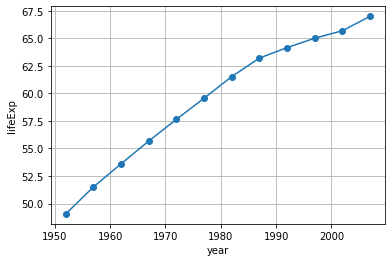

In [50]:
# pd.Series 객체의 index 속성과 values 속성을 각각 x축, y축으로 설정해서 그래프를 그림.
plt.plot(lifeExp_by_year.index, lifeExp_by_year.values, 'o-')
plt.xlabel('year')
plt.ylabel('lifeExp')
plt.grid()
plt.show()

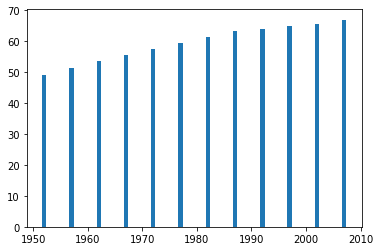

In [49]:
plt.bar(x=lifeExp_by_year.index, height=lifeExp_by_year.values)
plt.show()

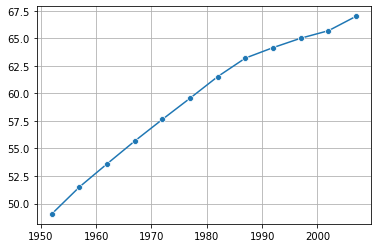

In [62]:
sns.lineplot(x=lifeExp_by_year.index, y=lifeExp_by_year.values, marker='o')
plt.grid()
plt.show()

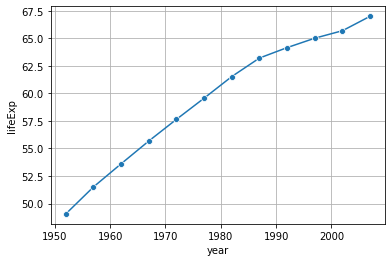

In [60]:
# seaborn 모듈의 함수들은 그룹별 통계(estimator)를 계산해서 그래프를 그려주는 기능을 가지고 있음.
# estimator의 기본값은 평균(mean).
sns.lineplot(x='year', y='lifeExp', data=gapminder, marker='o', err_style=None)
plt.grid()
plt.show()

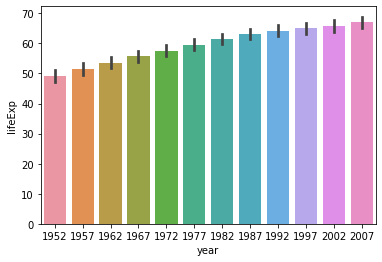

In [63]:
sns.barplot(x='year', y='lifeExp', data=gapminder)
plt.show()

* 연도별 1인당 GDP의 평균을 출력하세요.

* 연도별 1인당 GDP의 평균을 그래프로 그리세요.

* 연도별 전세계 인구를 출력하세요.

* 연도별 전세계 인구를 그래프로 그리세요.

* 연도별 대륙별 전세계 인구를 출력하세요

* 연도별 대륙별 전세계 인구를 그래프로 그리세요.

* 대한민국의 레코드만 출력하세요.